# project 2

**Problem Statement:** <br>
*Build a model that can predict whether a person received H1N1 flu vaccine based on the given dataset of input features*
- Target variabel: h1n1_vaccine
- Classifier should be used because target variable is categorical (binary)

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### Loading data

In [3]:
# df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [4]:
df = pd.read_csv("DataSets/h1n1_vaccine_prediction.csv")

### Exploring Data

In [5]:
df.shape

(26707, 34)

---

In [6]:
df.sample(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
18117,18117,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0
12261,12261,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Female,NaN,Married,Own,Employed,"MSA, Principle City",2.0,3.0,0
21119,21119,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,Black,Male,Below Poverty,Not Married,Rent,Unemployed,"MSA, Principle City",0.0,0.0,0
10012,10012,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Not Principle City",1.0,0.0,0
4671,4671,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,Other or Multiple,Male,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,"MSA, Principle City",3.0,0.0,0
1585,1585,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,Non-MSA,1.0,0.0,0
20461,20461,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Female,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,1
26044,26044,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,Hispanic,Male,NaN,NaN,NaN,NaN,"MSA, Not Principle City",0.0,3.0,0
12985,12985,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Female,"> $75,000",Married,Own,Not in Labor Force,Non-MSA,1.0,3.0,1
118,118,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [7]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

---

In [8]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

---

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

---

In [10]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

- has_health_insur has almost half of its value missing. It should be dropped

**Dropping *has_health_insur* column**

In [11]:
df.drop(['has_health_insur'], axis=1, inplace=True)

**Filling missing values with median value for numerical column**

In [12]:
miss_col_num = ['h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc' , 'no_of_adults', 'no_of_children']

In [13]:
df[miss_col_num] = df[miss_col_num].fillna(df[miss_col_num].median())

In [14]:
df[miss_col_num] = df[miss_col_num].astype(int)

**Fillig missing values with mode value for categorical column**

In [15]:
miss_col_cat = ['qualification', 'income_level', 'marital_status', 'housing_status', 'employment']

In [16]:
df[miss_col_cat] = df[miss_col_cat].fillna(df[miss_col_cat].mode().iloc[0])

---

In [17]:
dup = df.duplicated()
dup.sum()

0

- No duplicated rows

---

## Data Visualization

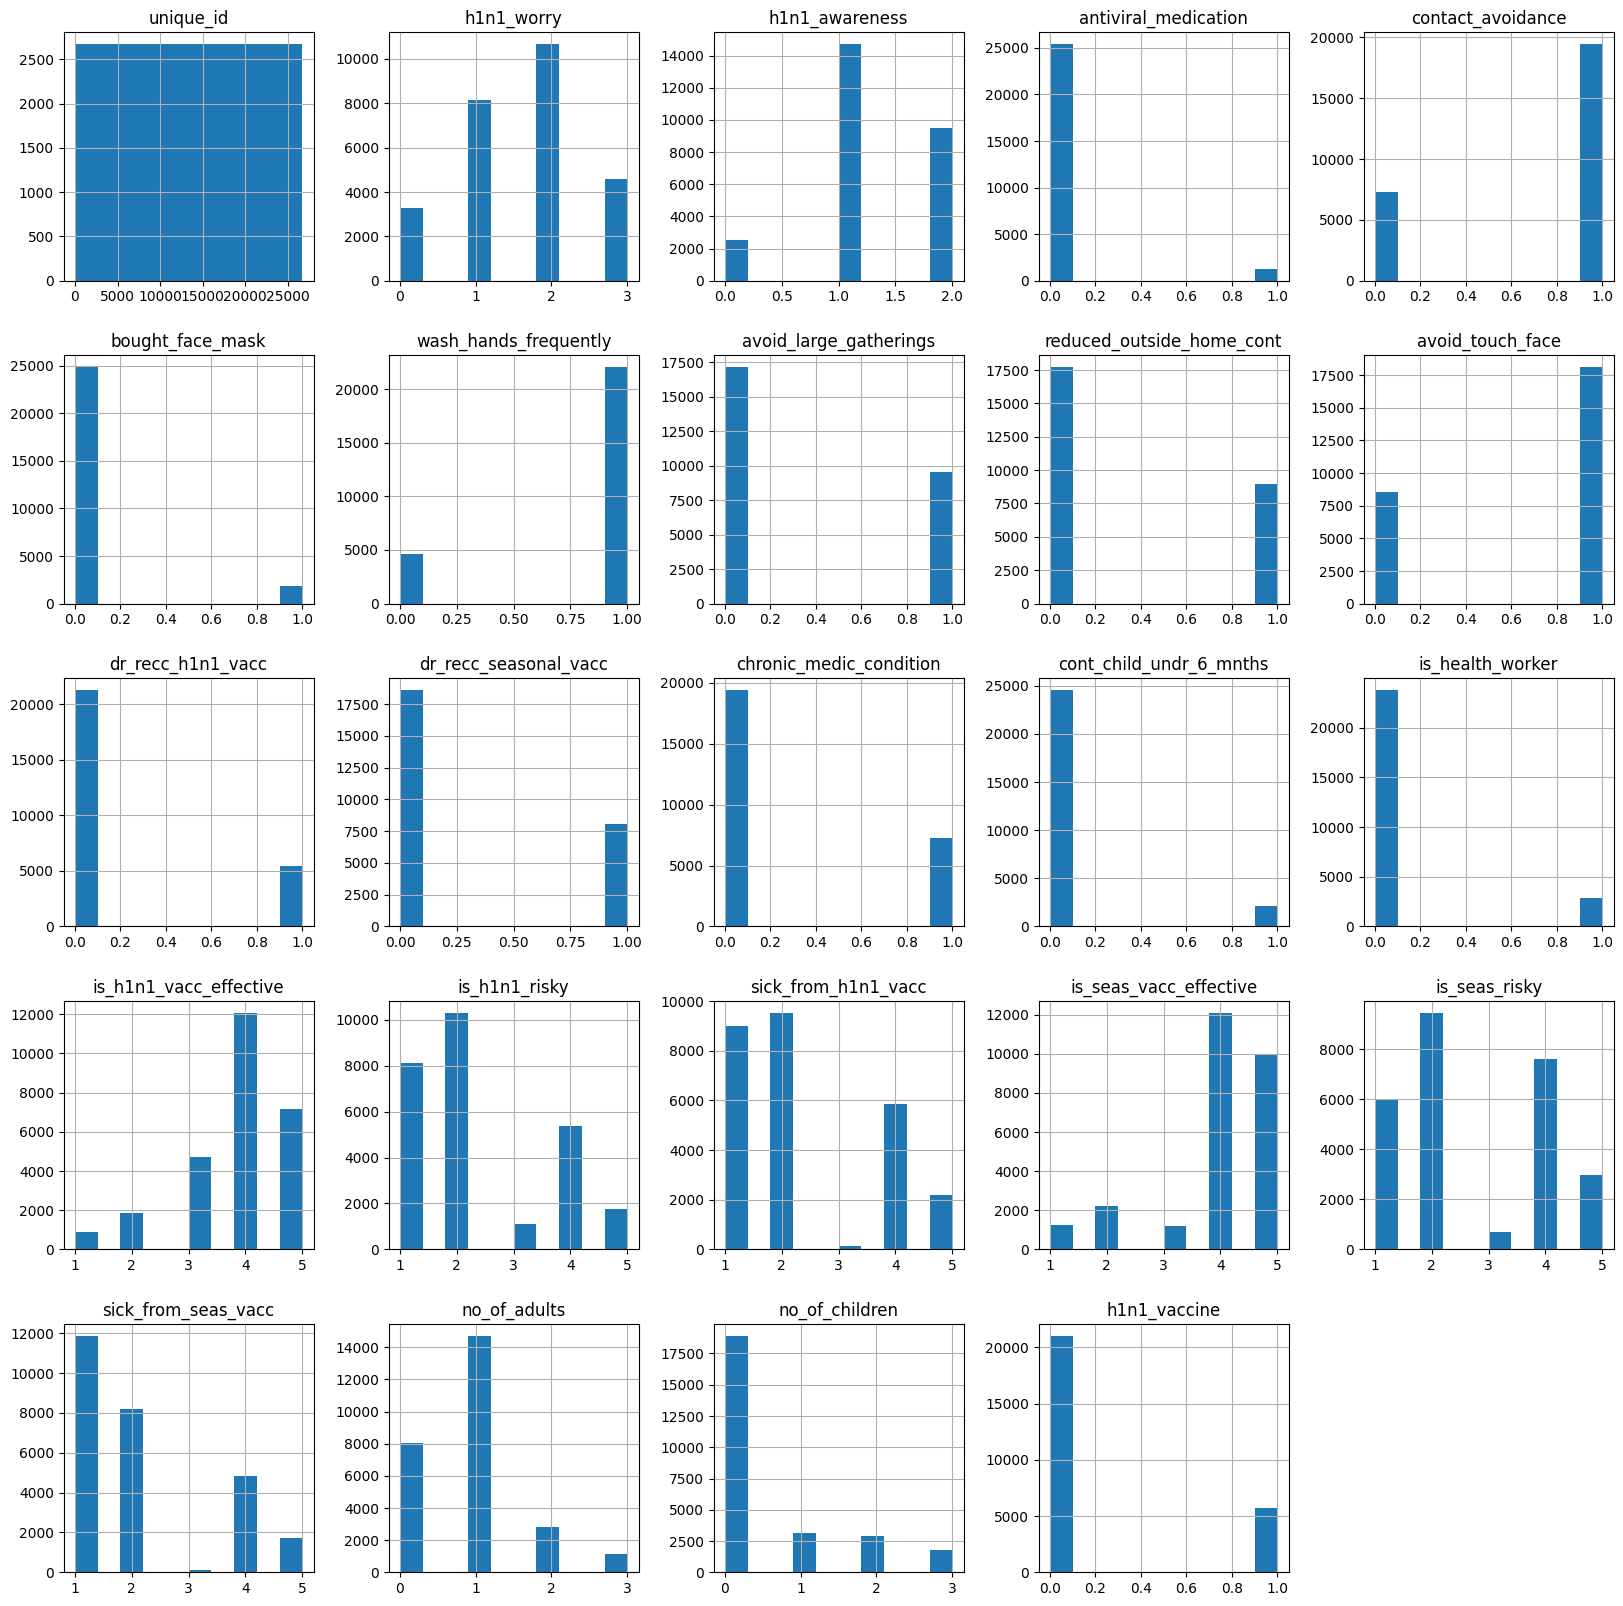

In [18]:
df.hist(figsize=(20,20))
plt.show()

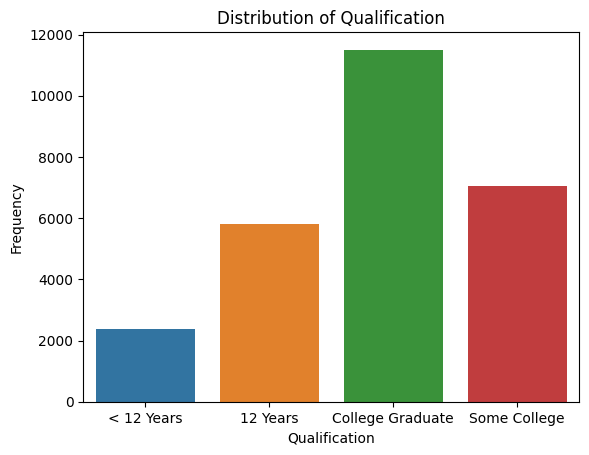

In [19]:
sns.countplot(x='qualification', data=df)
plt.xlabel('Qualification')
plt.ylabel('Frequency')
plt.title('Distribution of Qualification')
plt.show()


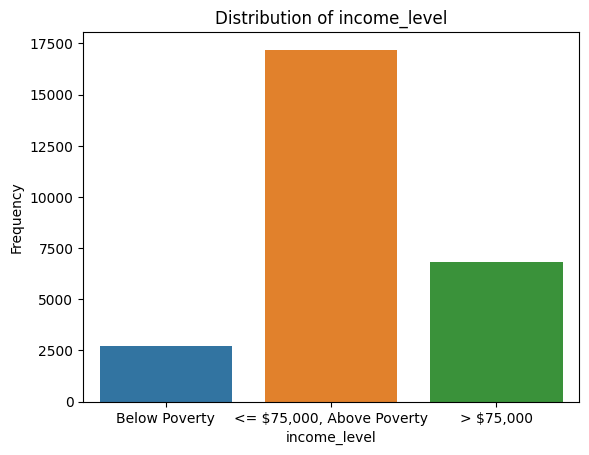

In [20]:
sns.countplot(x='income_level', data=df)
plt.xlabel('income_level')
plt.ylabel('Frequency')
plt.title('Distribution of income_level')
plt.show()

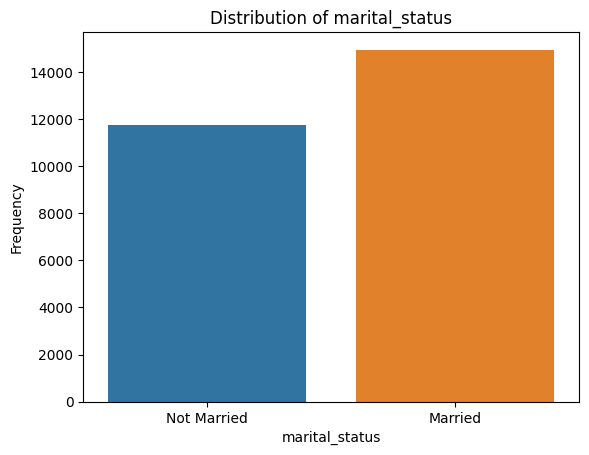

In [21]:
sns.countplot(x='marital_status', data=df)
plt.xlabel('marital_status')
plt.ylabel('Frequency')
plt.title('Distribution of marital_status')
plt.show()

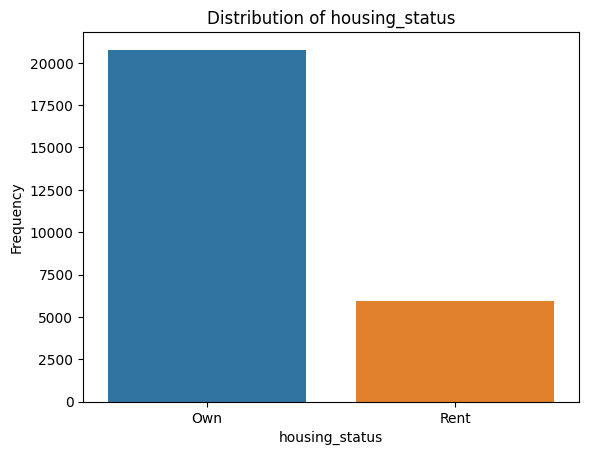

In [22]:
sns.countplot(x='housing_status', data=df)
plt.xlabel('housing_status')
plt.ylabel('Frequency')
plt.title('Distribution of housing_status')
plt.show()

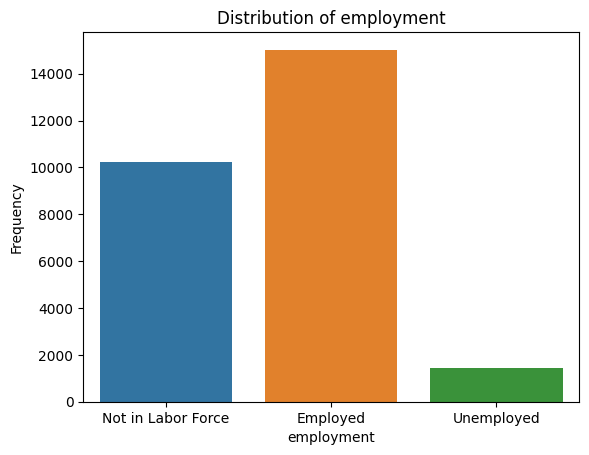

In [23]:
sns.countplot(x='employment', data=df)
plt.xlabel('employment')
plt.ylabel('Frequency')
plt.title('Distribution of employment')
plt.show()

---

### Encoding

In [24]:
cols = df.columns.tolist()
obj_cols = []

for col in cols:
    if df[col].dtype == 'object':
        obj_cols.append(col)

obj_cols

['age_bracket',
 'qualification',
 'race',
 'sex',
 'income_level',
 'marital_status',
 'housing_status',
 'employment',
 'census_msa']

In [25]:
dummies = pd.get_dummies(df[obj_cols])

In [26]:
df = pd.concat([df, dummies], axis = 1)

In [27]:
df.drop(obj_cols, axis=1, inplace = True)

In [28]:
df.dtypes

unique_id                                 int64
h1n1_worry                                int32
h1n1_awareness                            int32
antiviral_medication                      int32
contact_avoidance                         int32
bought_face_mask                          int32
wash_hands_frequently                     int32
avoid_large_gatherings                    int32
reduced_outside_home_cont                 int32
avoid_touch_face                          int32
dr_recc_h1n1_vacc                         int32
dr_recc_seasonal_vacc                     int32
chronic_medic_condition                   int32
cont_child_undr_6_mnths                   int32
is_health_worker                          int32
is_h1n1_vacc_effective                    int32
is_h1n1_risky                             int32
sick_from_h1n1_vacc                       int32
is_seas_vacc_effective                    int32
is_seas_risky                             int32
sick_from_seas_vacc                     

---

### Training Model

In [29]:
df.drop('unique_id', axis=1, inplace=True)

In [30]:
X = df.drop(['h1n1_vaccine'], axis=1)
Y = df[['h1n1_vaccine']]

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state=1)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc_X = StandardScaler()

In [34]:
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.fit_transform(X_test)

#### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model_LR = LogisticRegression()
model_LR.fit(X_train, Y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
model_LR.score(X_train, Y_train)

0.8334224884989836

In [38]:
model_LR.score(X_test, Y_test)

0.8398851865718208

#### Logistic Regression with Standardization

In [39]:
model_LR_sc = LogisticRegression()
model_LR_sc.fit(X_train_sc, Y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [40]:
model_LR_sc.score(X_train_sc, Y_train)

0.8340644056916657

In [41]:
model_LR_sc.score(X_test_sc, Y_test)

0.8393859977536503

#### KNN Classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
model_KC = KNeighborsClassifier(n_neighbors = 20)
model_KC.fit(X_train, Y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=20)

In [44]:
model_KC.score(X_train, Y_train)

0.8258799614849685

In [45]:
model_KC.score(X_test, Y_test)

0.8210408086858855

#### KNN Classifier with Standardization

In [46]:
model_KC_sc = KNeighborsClassifier(n_neighbors=8)
model_KC_sc.fit(X_train_sc, Y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=8)

In [47]:
model_KC_sc.score(X_train_sc, Y_train)

0.8306943404300845

In [48]:
model_KC_sc.score(X_test_sc, Y_test)

0.8134281792087857

#### SVC

In [49]:
from sklearn.svm import SVC

In [50]:
model_SC = SVC()
model_SC.fit(X_train, Y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [51]:
model_SC.score(X_train, Y_train)

0.837701936450198

In [52]:
model_SC.score(X_test, Y_test)

0.8378884312991389

#### Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
model_NB = GaussianNB()
model_NB.fit(X_train, Y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [55]:
model_NB.score(X_train, Y_train)

0.7643094040868728

In [56]:
model_NB.score(X_test, Y_test)

0.7709971296642956

#### Naive Bayes with Standardization

In [57]:
model_NB_sc = GaussianNB()
model_NB_sc.fit(X_train_sc, Y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [58]:
model_NB_sc.score(X_train_sc, Y_train)

0.7643094040868728

In [59]:
model_NB_sc.score(X_test_sc, Y_test)

0.7716211156870086

#### Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
model_DC = DecisionTreeClassifier(max_depth=6)
model_DC.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=6)

In [62]:
model_DC.score(X_train, Y_train)

0.8356157055739809

In [63]:
model_DC.score(X_test, Y_test)

0.83651566204917

#### Bagging Classifier

In [64]:
from sklearn.ensemble import BaggingClassifier

In [65]:
model_BC = BaggingClassifier(estimator=model_LR)
model_BC.fit(X_train, Y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERA

BaggingClassifier(estimator=LogisticRegression())

In [66]:
model_BC.score(X_train, Y_train)

0.8331015299026425

In [67]:
model_BC.score(X_test, Y_test)

0.8400099837763634

#### Ada Boosting Classifier

In [68]:
from sklearn.ensemble import AdaBoostClassifier

In [69]:
model_AC = AdaBoostClassifier()
model_AC.fit(X_train, Y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [70]:
model_AC.score(X_train, Y_train)

0.8325131058093506

In [71]:
model_AC.score(X_test, Y_test)

0.8405091725945338

#### Gradient Boosting Classifier

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
model_GC = GradientBoostingClassifier()
model_GC.fit(X_train, Y_train)

C:\Users\91768\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [74]:
model_GC.score(X_train, Y_train)

0.8425698084947042

In [75]:
model_GC.score(X_test, Y_test)

0.8460002495944091

#### Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
model_RC = RandomForestClassifier(max_depth=7)
model_RC.fit(X_train, Y_train)

C:\Users\91768\AppData\Local\Temp\ipykernel_4144\2056937919.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RC.fit(X_train, Y_train)


RandomForestClassifier(max_depth=7)

In [78]:
model_RC.score(X_train, Y_train)

0.8374879640526373

In [79]:
model_RC.score(X_test, Y_test)

0.8343941095719456

---

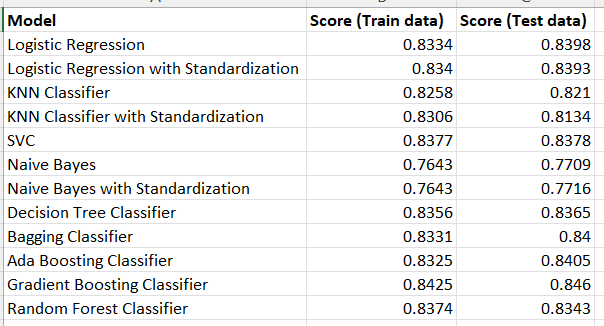

---

**By looking at the scores we can conclude that the best model is *model_GC* . i.e. Gradient Boosting Classifier**
- It has highest score for train as well as test data with compared to others
- no overfitting